# Data analisys of AirBnB bookings in Barcelona city

In this notebook we are going to explore data from AirBnb Barcelona dataset http://insideairbnb.com/get-the-data.html in the 2019 year and extract some insights of interest related to prices, neigbourhoods, avalability or room types in the city.

We also will answer the following questions with statiscal data and visualizations:
    
Which neighbourhood are in the city and which are your features?

Which is the median availability in days per year of each apartment according the district and type of room?

Which is the occupation of apartments per month in the last two years?

Which are the prices according the type of room and district in the city?

To answer these questions i have separate this notebook in the next sections:

1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
2. [Data Preparation](#Data-Preparation)
3. [Analisys and Visualization of Categorical Variables](#Categorical-Variables)
4. [Relation beetween districts and neigbourhoods](#Districts-Neigbourhoods)
5. [Data related to Room type](#Data-related-to-Room-type)
6. [Data related to availabily of rooms in 2019](#Data-Availability-Rooms)
7. [Occupation in the last 2 years: 2018 and 2019 of AirBnb listings in Barcelona](#Ocupation-2018-2019)
8. [Data related to 2019 booking prices](#Data-Booking-Prices)
9. [Price comparison about three of the most populars districts in Barcelona city: Eixample, Ciutat Vella and Les Corts](#Comparison-Prices)

    
    

In [2]:
#Import libraries, read and show head datasets.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

#Read reviews dataset (relation between listings and review dates)
df_reviews = pd.read_csv('reviews_.csv',parse_dates=['date'])

#Read neighbourhood dataset (relation between neighbourhoods_groups and neighbourhoods)
df_neighbourhood = pd.read_csv('neighbourhoods.csv')

#Read listings dataset (information about each airBnb listing in Barcelona city)
df = pd.read_csv('listings.csv', parse_dates=['last_review'])

In [7]:
df_reviews.head()

,listing_id,date
0,18666,2015-10-10
1,18674,2013-05-27
2,18674,2014-03-02
3,18674,2015-08-04
4,18674,2016-06-20


In [8]:
df_reviews.shape

(740992, 2)

<a id='Exploratory-Data-Analysis'></a>
## Exploratory Data Analysis

In [9]:
df_neighbourhood.head()

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


In [10]:
#Dimension of neighbourhoods dataset in number of rows and columns
df_neighbourhood.shape

(73, 2)

In [11]:
#General info about neighbourhood dataset (number of rows not null and type) about each column
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
neighbourhood_group    73 non-null object
neighbourhood          73 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


Now we go to explore listings dataset, where we get the most interest information for the analisys.

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


In [13]:
#Dimension of listing dataset in number of rows and columns
df.shape

(20428, 16)

In [14]:
#Statistical information about numerical variables
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.042800e+04,2.042800e+04,20428.000000,20428.000000,20428.000000,20428.000000,20428.00000,16152.000000,20428.000000,20428.000000
mean,2.286960e+07,9.714553e+07,41.391990,2.167697,134.587429,8.736244,36.27335,1.861225,14.716370,183.984286
std,1.236744e+07,9.864641e+07,0.014976,0.017962,478.968270,18.702046,62.75757,1.766933,30.366928,134.907793
min,1.866600e+04,3.073000e+03,41.349540,2.077820,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,1.326226e+07,8.359694e+06,41.380270,2.157120,39.000000,1.000000,1.00000,0.440000,1.000000,54.000000
50%,2.415390e+07,5.200252e+07,41.388855,2.168445,60.000000,2.000000,9.00000,1.320000,2.000000,179.000000
75%,3.432116e+07,1.723129e+08,41.402160,2.178070,105.000000,4.000000,43.00000,2.860000,11.000000,323.000000
max,3.997381e+07,3.081175e+08,41.464010,2.230570,15000.000000,900.000000,694.00000,31.210000,155.000000,365.000000


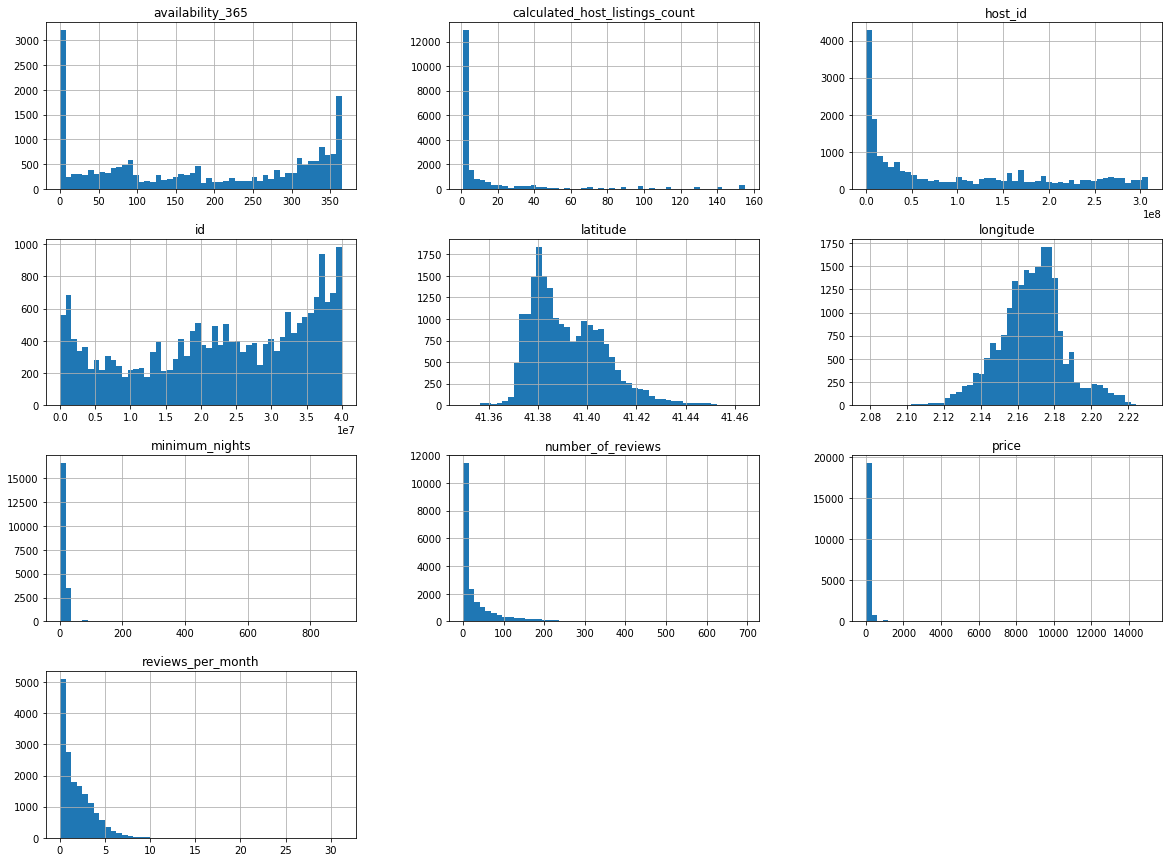

In [15]:
#Histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

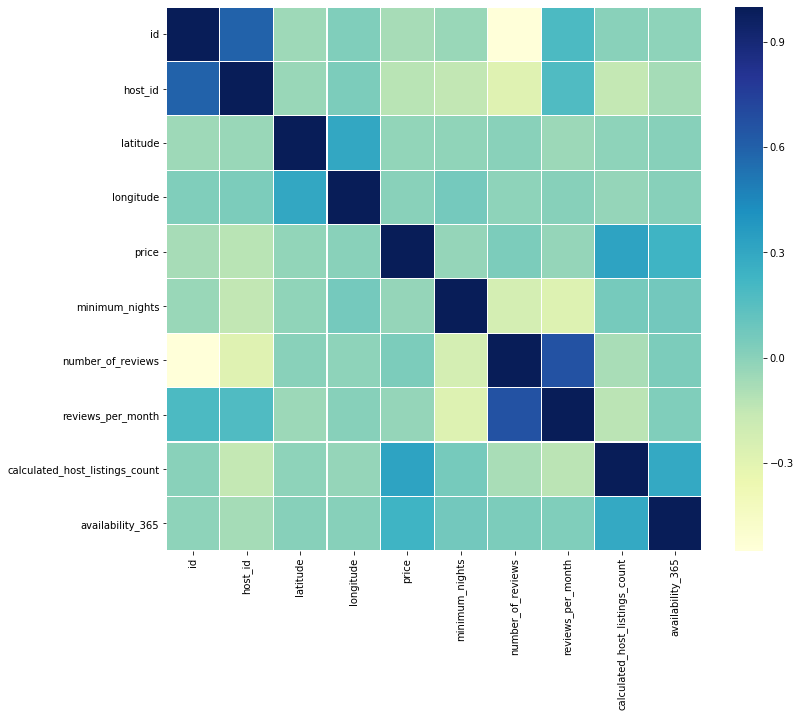

In [4]:
#Map of correlation beetwen variables
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [17]:
#General info about listings dataset (number of rows not null and type) about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Data columns (total 16 columns):
id                                20428 non-null int64
name                              20413 non-null object
host_id                           20428 non-null int64
host_name                         20411 non-null object
neighbourhood_group               20428 non-null object
neighbourhood                     20428 non-null object
latitude                          20428 non-null float64
longitude                         20428 non-null float64
room_type                         20428 non-null object
price                             20428 non-null int64
minimum_nights                    20428 non-null int64
number_of_reviews                 20428 non-null int64
last_review                       16152 non-null datetime64[ns]
reviews_per_month                 16152 non-null float64
calculated_host_listings_count    20428 non-null int64
availability_365                  20428 non-nu

In [18]:
#Finding out the earliest and latest review date
df['last_review'] = pd.to_datetime(df['last_review'])
oldest_date = df['last_review'].min()
newest_date = df['last_review'].max()
print(oldest_date)
print(newest_date)

2011-06-23 00:00:00
2019-11-11 00:00:00


## Data Preparation

In [8]:
#Data wrangling

#First will rename neigbourhood_group column to district in both datatsets
df_neighbourhood = df_neighbourhood.rename(columns={"neighbourhood_group": "district"})
df = df.rename(columns={"neighbourhood_group": "district"})

#The are not necessary id columns(id, host_id) neither description columns (name, host_name)
df = df.drop(['id', 'host_id', 'name', 'host_name'], axis=1)

#Print all columns without NA values
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'neighbourhood', 'calculated_host_listings_count', 'room_type', 'number_of_reviews', 'latitude', 'minimum_nights', 'longitude', 'availability_365', 'district', 'price'}


We can see columns like name, last_review and rewiews_per_month, have missing values since they have less than 20428 rows informed as non-null in the above info() form. Only rewiews_per_month is an useful column for our analysis in the future (if we need to build a linear regression model for example), then the best option is fill this nulls with the column mean.

In [20]:
#Function that calculates mean and fill the missing values of the column passed by parameter.
fill_mean = lambda col: col.fillna(col.mean())
df['reviews_per_month'] =fill_mean(df.reviews_per_month)

In [21]:
df.head()

,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


<a id='Categorical-Variables'></a>
## Analisys and Visualization of Categorical Variables

Let's go to take a look about categorical variables of interest in our analysis.

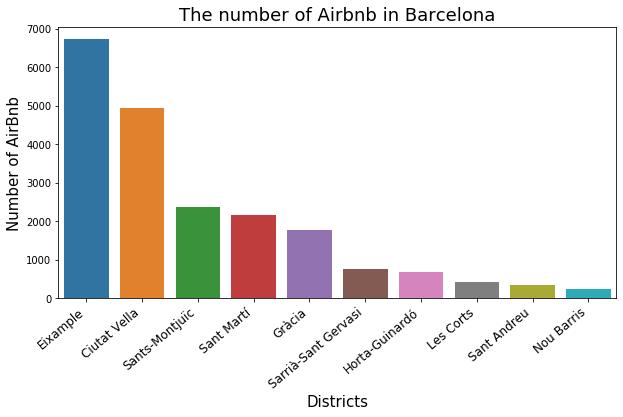

Eixample               6719
Ciutat Vella           4943
Sants-Montjuïc         2363
Sant Martí             2174
Gràcia                 1771
Sarrià-Sant Gervasi     757
Horta-Guinardó          674
Les Corts               421
Sant Andreu             354
Nou Barris              252
Name: district, dtype: int64

In [22]:
#Show number of listings by district
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='district', data=df, order = df.district.value_counts().sort_values(ascending=False).index)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of AirBnb', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Airbnb in Barcelona', fontsize=18)

plt.show()

df.district.value_counts().sort_values(ascending=False)

<a id='Districts-Neigbourhoods'></a>
## Relation beetween districts and neigbourhoods

In Barcelona city exists 10 districts all of them have diferent neigbourhoods, AirBnb listings are distributed around these and each one belong to one neibourhood and district (in dataset called neigbourhood_group).

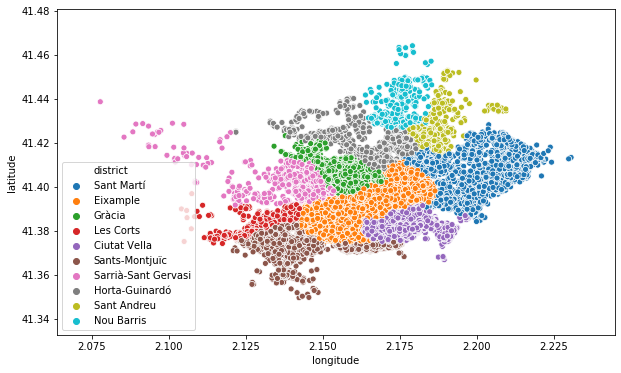

In [9]:
#Visualization of bookings in the Barcelona map (according on latitude and longitude columns)
#sns.lmplot(x='longitude', y='latitude', data=df, fit_reg=False, hue='district', height=10)

#plt.title('Distribution of AirBnb listings by district in Barcelona', fontsize=18)

#plt.xlim(2.24,2.08)
#plt.ylim(41.34, 41.48)

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.district)
plt.ioff()

In [24]:
#All Neighbourhoods per district
pd.DataFrame(df_neighbourhood.groupby(["district", "neighbourhood"]).count())

Empty DataFrame
Columns: []
Index: [(Ciutat Vella, Sant Pere, Santa Caterina i la Ribera), (Ciutat Vella, el Barri Gòtic), (Ciutat Vella, el Raval), (Ciutat Vella, la Barceloneta), (Eixample, Sant Antoni), (Eixample, el Fort Pienc), (Eixample, l'Antiga Esquerra de l'Eixample), (Eixample, la Dreta de l'Eixample), (Eixample, la Nova Esquerra de l'Eixample), (Eixample, la Sagrada Família), (Gràcia, Vallcarca i els Penitents), (Gràcia, el Camp d'en Grassot i Gràcia Nova), (Gràcia, el Coll), (Gràcia, la Salut), (Gràcia, la Vila de Gràcia), (Horta-Guinardó, Can Baró), (Horta-Guinardó, Horta), (Horta-Guinardó, Montbau), (Horta-Guinardó, Sant Genís dels Agudells), (Horta-Guinardó, el Baix Guinardó), (Horta-Guinardó, el Carmel), (Horta-Guinardó, el Guinardó), (Horta-Guinardó, la Clota), (Horta-Guinardó, la Font d'en Fargues), (Horta-Guinardó, la Teixonera), (Horta-Guinardó, la Vall d'Hebron), (Les Corts, Pedralbes), (Les Corts, la Maternitat i Sant Ramon), (Les Corts, les Corts), (Nou Barris, Can Peguera), (Nou Barris, Canyelles), (Nou Barris, Ciutat Meridiana), (Nou Barris, Porta), (Nou Barris, Torre Baró), (Nou Barris, Vallbona), (Nou Barris, Verdun), (Nou Barris, Vilapicina i la Torre Llobeta), (Nou Barris, el Turó de la Peira), (Nou Barris, la Guineueta), (Nou Barris, la Prosperitat), (Nou Barris, la Trinitat Nova), (Nou Barris, les Roquetes), (Sant Andreu, Baró de Viver), (Sant Andreu, Navas), (Sant Andreu, Sant Andreu), (Sant Andreu, el Bon Pastor), (Sant Andreu, el Congrés i els Indians), (Sant Andreu, la Sagrera), (Sant Andreu, la Trinitat Vella), (Sant Martí, Diagonal Mar i el Front Marítim del Poblenou), (Sant Martí, Provençals del Poblenou), (Sant Martí, Sant Martí de Provençals), (Sant Martí, el Besòs i el Maresme), (Sant Martí, el Camp de l'Arpa del Clot), (Sant Martí, el Clot), (Sant Martí, el Parc i la Llacuna del Poblenou), (Sant Martí, el Poblenou), (Sant Martí, la Verneda i la Pau), (Sant Martí, la Vila Olímpica del Poblenou), (Sants-Montjuïc, Hostafrancs), (Sants-Montjuïc, Sants), (Sants-Montjuïc, Sants - Badal), (Sants-Montjuïc, el Poble Sec), (Sants-Montjuïc, la Bordeta), (Sants-Montjuïc, la Font de la Guatlla), (Sants-Montjuïc, la Marina de Port), (Sants-Montjuïc, la Marina del Prat Vermell), (Sarrià-Sant Gervasi, Sant Gervasi - Galvany), (Sarrià-Sant Gervasi, Sant Gervasi - la Bonanova), (Sarrià-Sant Gervasi, Sarrià), (Sarrià-Sant Gervasi, Vallvidrera, el Tibidabo i les Planes), (Sarrià-Sant Gervasi, el Putxet i el Farró), (Sarrià-Sant Gervasi, les Tres Torres)]

[73 rows x 0 columns]

### Data related to Room type

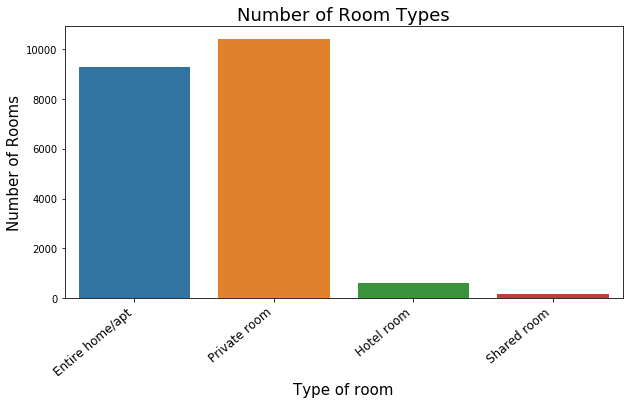

Private room       10387
Entire home/apt     9268
Hotel room           615
Shared room          158
Name: room_type, dtype: int64

In [25]:
#Show the number of room types 
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='room_type', data=df)
plt.title('Number of Room Types', fontsize=18)

ax.set_xlabel('Type of room', weight='normal', size=15)
ax.set_ylabel('Number of Rooms', weight='normal', size=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size =12)

plt.show()

df.room_type.value_counts()

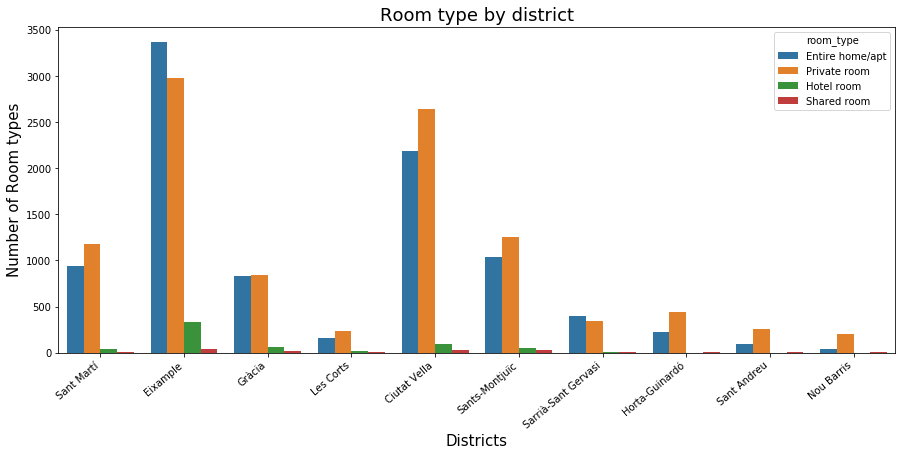

In [26]:
#Show number and type of rooms by neighbourhood
plt.figure(figsize = (15, 6))
ax = sns.countplot(x='district', hue='room_type', data=df)
ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Room type by district', fontsize=18)

plt.show()

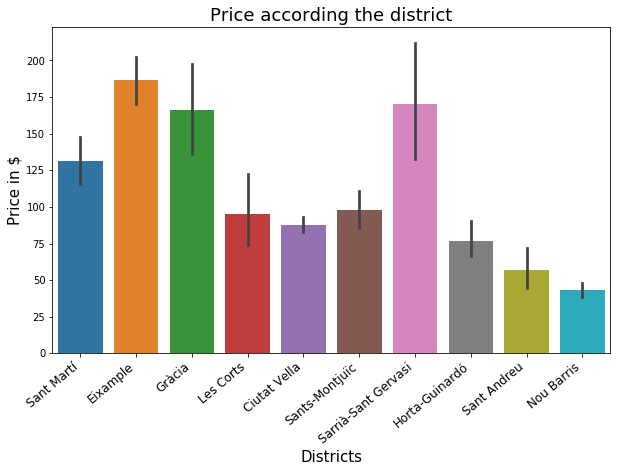

In [27]:
#Show relation beetwen price and district
plt.figure(figsize = (10, 6))
ax = sns.barplot(df.district, df.price)
plt.title('Price according the district', fontsize=18)

ax.set_xlabel('Districts', weight='normal', size=15)
ax.set_ylabel('Price in $', weight='normal', size=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size= 12)

plt.show()

room_type
Private room        53.973140
Shared room        170.094937
Entire home/apt    190.673716
Hotel room         641.778862
Name: price, dtype: float64


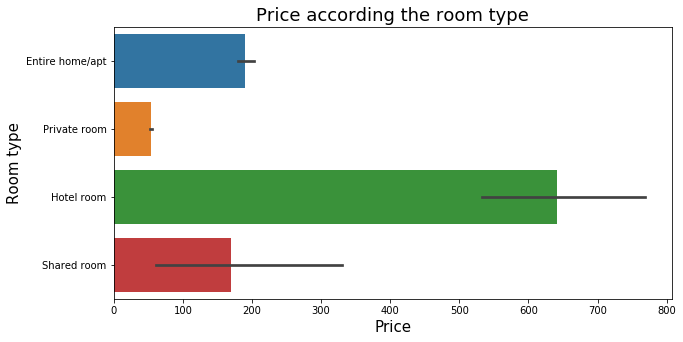

In [28]:
#Relation beetwen price and type room
df_price_room_type = df.groupby(['room_type']).mean()['price'].sort_values()
print(df_price_room_type)

#Show price per room type
plt.figure(figsize = (10, 5))
ax = sns.barplot(df.price, df.room_type)
ax.set_xlabel('Price', weight='normal', size=15)
ax.set_ylabel('Room type', weight='normal', size=15)
plt.title('Price according the room type', fontsize=18)

plt.show()

In [29]:
#Highest median prices according the district and the room type
pd.DataFrame(df.groupby(['district','room_type']).mean()['price'].sort_values(ascending=False)).head(15)

price
district            room_type                   
Gràcia              Hotel room       1299.597015
                    Shared room       858.476190
Eixample            Hotel room        711.465672
Sarrià-Sant Gervasi Hotel room        693.200000
Sant Martí          Hotel room        590.071429
Ciutat Vella        Hotel room        300.873684
Horta-Guinardó      Shared room       282.666667
Sarrià-Sant Gervasi Shared room       271.666667
                    Entire home/apt   259.437975
Eixample            Entire home/apt   250.189245
Sant Martí          Entire home/apt   221.266241
Gràcia              Entire home/apt   170.088517
Sants-Montjuïc      Hotel room        165.130435
                    Entire home/apt   157.322705
Les Corts           Entire home/apt   147.696203

In [30]:
#Lowest median prices according the district and the room type
pd.DataFrame(df.groupby(['district','room_type']).mean()['price'].sort_values()).head(15)

,,price
district,room_type,
Nou Barris,Hotel room,16.000000
Sant Andreu,Shared room,21.333333
Nou Barris,Shared room,33.200000
Les Corts,Shared room,33.454545
Sant Martí,Shared room,33.909091
Sants-Montjuïc,Shared room,35.428571
Nou Barris,Private room,36.960976
Ciutat Vella,Shared room,41.185185
Horta-Guinardó,Hotel room,42.000000


room_type
Hotel room          3.308943
Shared room         3.405063
Private room        5.623087
Entire home/apt    12.676306
Name: minimum_nights, dtype: float64


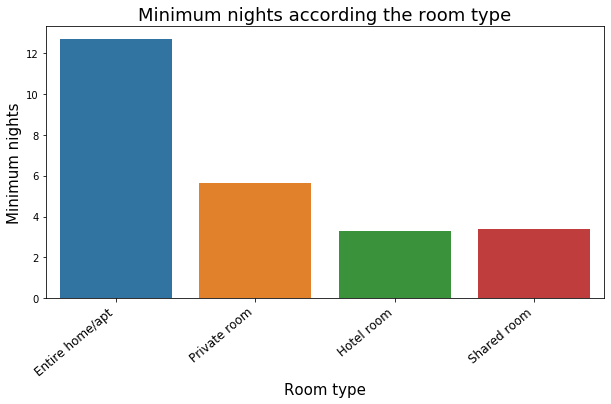

In [31]:
#Relation beetwen minimum_nights in days and type room
df_price_room_type = df.groupby(['room_type']).mean()['minimum_nights'].sort_values()
print(df_price_room_type)

#Show minimum nights stand in days according the room type
plt.figure(figsize = (10, 5))
ax = sns.barplot(df.room_type, df.minimum_nights, ci = None)
ax.set_xlabel('Room type', weight='normal', size=15)
ax.set_ylabel('Minimum nights', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size = 12)
plt.title('Minimum nights according the room type', fontsize=18)

plt.show()

<a id='Data-Availability-Rooms'></a>
### Data related to availabily of rooms in 2019

In [32]:
#Relation beetwen district and availability in days per year
df_price_room_type=pd.DataFrame(df.groupby(['district']).mean()['availability_365'].sort_values(ascending=False))
df_price_room_type.availability_365 = df_price_room_type.availability_365.round(1)
#df_price_room_type = df_price_room_type.rename({"availability_365" : "Avalability"})
df_price_room_type

,availability_365
district,
Sarrià-Sant Gervasi,196.3
Eixample,193.0
Nou Barris,187.9
Gràcia,182.1
Sants-Montjuïc,181.0
Sant Martí,179.7
Ciutat Vella,176.7
Horta-Guinardó,174.8
Sant Andreu,174.6


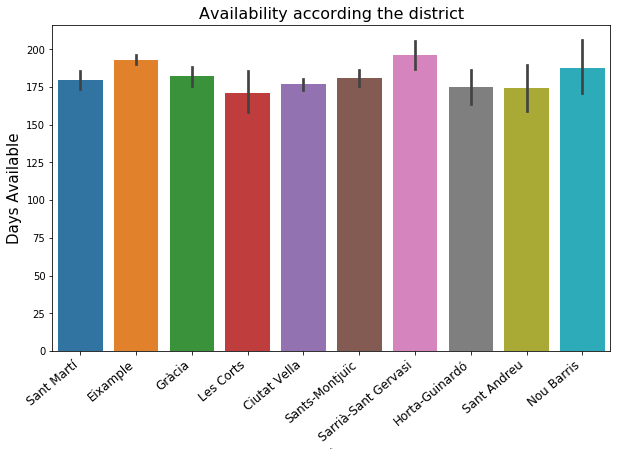

In [33]:
#Show availability in days according district
plt.figure(figsize = (10, 6))
ax = sns.barplot(df.district, df.availability_365)
plt.title('Availability according the district', fontsize=16)

ax.set_xlabel('District', weight='normal', size=1)
ax.set_ylabel('Days Available', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size = 12)

plt.show()

room_type
Private room       143.552999
Shared room        193.841772
Entire home/apt    224.168861
Hotel room         258.734959
Name: availability_365, dtype: float64


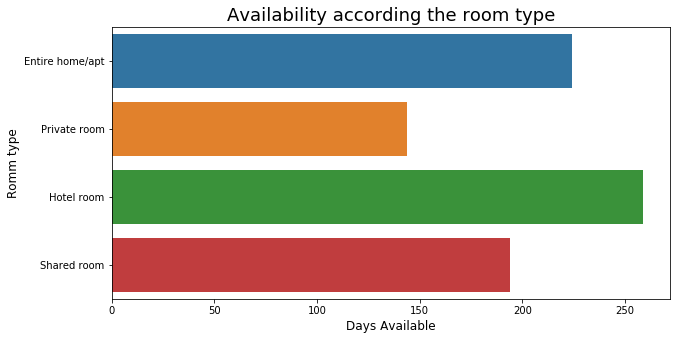

In [34]:
#Relation beetwen minimum_nights stand and type room
df_price_room_type = df.groupby(['room_type']).mean()['availability_365'].sort_values()
print(df_price_room_type)

#Show availability in days according room type
plt.figure(figsize = (10, 5))
ax = sns.barplot(df.availability_365, df.room_type, ci = None)

ax.set_xlabel('Days Available', weight='normal', size=12)
ax.set_ylabel('Romm type', weight='normal', size=12)
plt.title('Availability according the room type', fontsize=18)

plt.show()

In [35]:
#Lowest median availability per year in days according the neigbourhood and district
pd.DataFrame(df.groupby(['neighbourhood','district']).mean()['availability_365'].sort_values()).head(15)

,,availability_365
neighbourhood,district,
el Bon Pastor,Sant Andreu,117.190476
la Marina de Port,Sants-Montjuïc,129.688172
la Font d'en Fargues,Horta-Guinardó,135.400000
Sarrià,Sarrià-Sant Gervasi,135.952381
Verdun,Nou Barris,137.482759
la Bordeta,Sants-Montjuïc,142.240876
Pedralbes,Les Corts,145.913043
la Font de la Guatlla,Sants-Montjuïc,146.514493
la Guineueta,Nou Barris,147.357143


In [36]:
#Highest median availability per year in days according the neigbourhood and district
pd.DataFrame(df.groupby(['neighbourhood','district']).mean()['availability_365'].sort_values(ascending=False)).head(15)

,,availability_365
neighbourhood,district,
Ciutat Meridiana,Nou Barris,276.500000
la Prosperitat,Nou Barris,273.266667
Can Peguera,Nou Barris,272.000000
la Marina del Prat Vermell,Sants-Montjuïc,235.071429
Sant Genís dels Agudells,Horta-Guinardó,230.310345
les Tres Torres,Sarrià-Sant Gervasi,226.818182
Torre Baró,Nou Barris,222.400000
"Vallvidrera, el Tibidabo i les Planes",Sarrià-Sant Gervasi,221.142857
el Turó de la Peira,Nou Barris,215.218750


In [37]:
#Highest median availability per year in days according the district and room type
pd.DataFrame(df.groupby(['district','room_type']).mean()['availability_365'].sort_values(ascending=False)).head(15)

availability_365
district            room_type                        
Nou Barris          Hotel room             325.000000
Les Corts           Hotel room             311.352941
Ciutat Vella        Hotel room             279.073684
Sant Martí          Hotel room             273.023810
Gràcia              Shared room            261.952381
Eixample            Hotel room             261.223881
Sarrià-Sant Gervasi Entire home/apt        238.772152
Sants-Montjuïc      Entire home/apt        234.107246
                    Shared room            234.000000
Sant Martí          Shared room            228.909091
Gràcia              Hotel room             228.641791
Eixample            Entire home/apt        227.849079
Sant Martí          Entire home/apt        224.617678
Sants-Montjuïc      Hotel room             221.239130
Sant Andreu         Entire home/apt        220.836957

In [38]:
#Lowest median availability per year in days according the district and room type
pd.DataFrame(df.groupby(['district','room_type']).mean()['availability_365'].sort_values()).head(15)

availability_365
district            room_type                     
Horta-Guinardó      Hotel room           17.000000
                    Shared room          75.666667
Sarrià-Sant Gervasi Shared room         107.333333
Sant Andreu         Shared room         111.333333
Sants-Montjuïc      Private room        134.485646
Les Corts           Private room        136.310638
Ciutat Vella        Private room        139.774829
Sant Martí          Private room        140.178511
Gràcia              Private room        141.668241
Eixample            Private room        146.132975
Sarrià-Sant Gervasi Private room        148.363897
Horta-Guinardó      Private room        159.502242
Sant Andreu         Private room        159.996047
Ciutat Vella        Shared room         162.111111
Eixample            Shared room         172.300000

<a id='Ocupation-2018-2019'></a>
## Occupation in the last 2 years: 2018 and 2019 of AirBnb listings in Barcelona

According to AirBnb data information in your website http://insideairbnb.com/barcelona: "Airbnb guests may leave a review after their stay, and these can be used as an indicator of airbnb activity." 

In [39]:
# make new dataframe for number of reviews
rev_freq = pd.DataFrame(df_reviews['date'].value_counts().values,
                        index=df_reviews['date'].value_counts().index,
                        columns=['Number of reviews'])

# Select 2019 year
rev_freq_2019 = rev_freq.loc['2019']

# Calculates review per month in selected year
rev_2019_months = rev_freq_2019.resample('M').sum()
rev_2019_months['%'] = (rev_2019_months['Number of reviews']*100)/rev_2019_months['Number of reviews'].sum()

rev_2019_months

,Number of reviews,%
2019-01-31,13168,5.175897
2019-02-28,15251,5.994654
2019-03-31,20644,8.114461
2019-04-30,24231,9.524390
2019-05-31,27585,10.842734
2019-06-30,29286,11.511340
2019-07-31,28973,11.388310
2019-08-31,28067,11.032192
2019-09-30,32730,12.865060
2019-10-31,31250,12.283322


In [40]:
# Select 2018 year
rev_freq_2018 = rev_freq.loc['2018']

# Calculates review per month in selected year
rev_2018_months = rev_freq_2018.resample('M').sum()
rev_2018_months['%'] = (rev_2018_months['Number of reviews']*100)/rev_2018_months['Number of reviews'].sum()

rev_2018_months

,Number of reviews,%
2018-01-31,8097,4.437150
2018-02-28,8634,4.731426
2018-03-31,12246,6.710799
2018-04-30,16004,8.770180
2018-05-31,17571,9.628895
2018-06-30,18086,9.911115
2018-07-31,19216,10.530354
2018-08-31,17326,9.494635
2018-09-30,18959,10.389518
2018-10-31,20532,11.251521


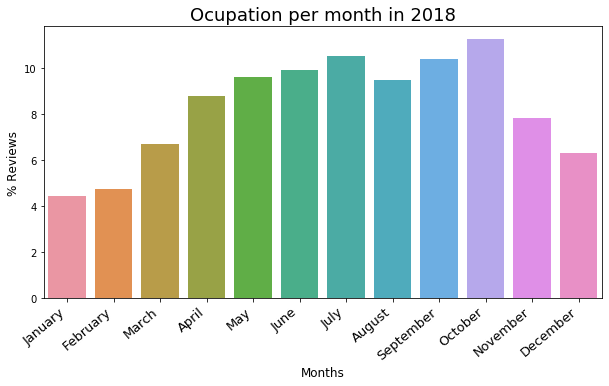

In [41]:
#Show Reviews per mont in 2019
fig1 = plt.figure(figsize=(10, 5))
ax = fig1.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=rev_2018_months.index.month_name(), y=rev_2018_months['%'])

# Set axis labels
ax.set_xlabel('Months', weight='normal', size=12)
ax.set_ylabel('% Reviews', weight='normal', size=12)
plt.title('Ocupation per month in 2018', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
plt.show()

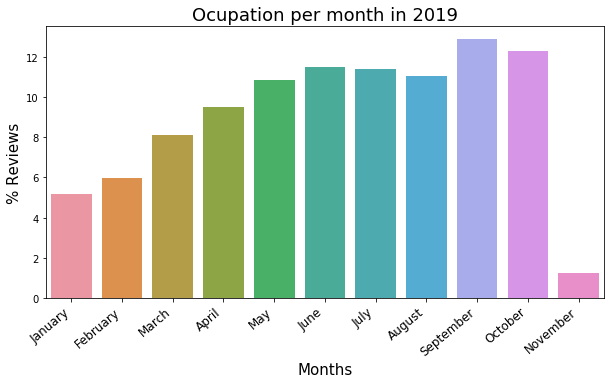

In [42]:
#Show Reviews per mont in 2019
fig1 = plt.figure(figsize=(10, 5))
ax = fig1.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=rev_2019_months.index.month_name(), y=rev_2019_months['%'])

# Set axis labels
ax.set_xlabel('Months', weight='normal', size=15)
ax.set_ylabel('% Reviews', weight='normal', size=15)
plt.title('Ocupation per month in 2019', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plt.show()

<a id='Data-Booking-Prices'></a>
## Data related to 2019 booking prices

In [43]:
#Highest median prices in dollars according the neigbourhood and district
pd.DataFrame(df.groupby(['neighbourhood','district']).mean()['price'].sort_values(ascending=False)).head(15)

,,price
neighbourhood,district,
la Marina del Prat Vermell,Sants-Montjuïc,656.428571
Sant Gervasi - la Bonanova,Sarrià-Sant Gervasi,344.796296
Sant Antoni,Eixample,249.572573
la Dreta de l'Eixample,Eixample,245.116246
el Putxet i el Farró,Sarrià-Sant Gervasi,237.745690
la Font d'en Fargues,Horta-Guinardó,236.300000
Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,233.524752
la Vila de Gràcia,Gràcia,212.223708
l'Antiga Esquerra de l'Eixample,Eixample,195.201112


In [44]:
#Lowest median prices according the neigbourhood and district
pd.DataFrame(df.groupby(['neighbourhood','district']).mean()['price'].sort_values()).head(15)

,,price
neighbourhood,district,
Can Peguera,Nou Barris,22.500000
Baró de Viver,Sant Andreu,25.000000
Montbau,Horta-Guinardó,27.826087
la Trinitat Nova,Nou Barris,29.200000
Ciutat Meridiana,Nou Barris,30.500000
la Trinitat Vella,Sant Andreu,32.687500
la Prosperitat,Nou Barris,36.066667
Verdun,Nou Barris,36.931034
la Verneda i la Pau,Sant Martí,37.382716


<a id='Comparison-Prices'></a>
## Price comparison about three of the most populars districts in Barcelona city: Eixample, Ciutat Vella and Les Corts

In [45]:
#Function that calculates the price median of each room type in the district and shows the plot visualization
def calculate_price_mean_and_plot(filtered_df, plot=True):
    '''
    INPUT 
        filtered_df - a dataframe filtered by the district column
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        df_price_room_type - a dataframe with the price per room type in the district filtered
        Displays a barplot of pretty things related to the district and type of room columns.
    '''

    #Get the name of the district in filtered dataset
    distric_name = filtered_df['district'].iloc[0]
    
    #Agroupation beetwen price and type room
    df_price_room_type = pd.DataFrame(filtered_df.groupby(['room_type']).mean()['price'].sort_values(ascending=False))

    #Plot the agroupation
    if plot:
        #Show price per room type
        plt.figure(figsize = (10, 5))
        ax = sns.barplot(filtered_df.price, filtered_df.room_type, ci = None, palette = 'magma')
        ax.set_xlabel('Price', weight='normal', size=12)
        ax.set_ylabel('Room type', weight='normal', size=12)
        plt.title('Price according the room type in {}'.format(distric_name), fontsize=18)

        plt.show()
        
    return df_price_room_type
    

### Les Corts district:

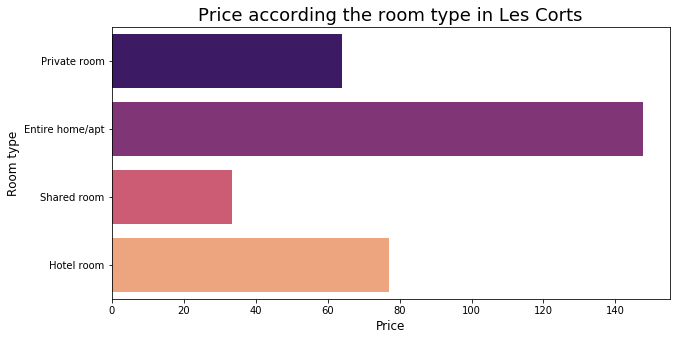

,price
room_type,
Entire home/apt,147.696203
Hotel room,77.176471
Private room,63.906383
Shared room,33.454545


In [46]:
#Call to calculate_price_mean_and_plot function with Les Corts district data 
calculate_price_mean_and_plot(df[df.district == 'Les Corts'])


In [47]:
#Median price booking table of each neigbourhood of Les Corts district per room type
pd.DataFrame(df.query("district == 'Les Corts'").groupby(['district','neighbourhood','room_type']).mean()['price'])

price
district  neighbourhood              room_type                  
Les Corts Pedralbes                  Entire home/apt  162.166667
                                     Private room      55.176471
          la Maternitat i Sant Ramon Entire home/apt  210.039216
                                     Hotel room        83.500000
                                     Private room      66.044643
                                     Shared room       23.400000
          les Corts                  Entire home/apt  115.356436
                                     Hotel room        76.333333
                                     Private room      63.047170
                                     Shared room       41.833333

### Eixample district:

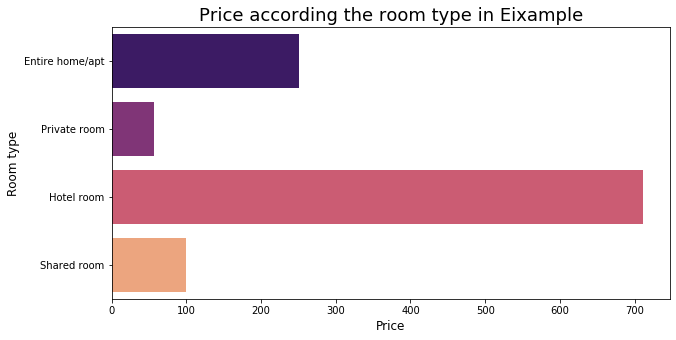

,price
room_type,
Hotel room,711.465672
Entire home/apt,250.189245
Shared room,99.525000
Private room,56.750839


In [48]:
#Call to calculate_price_mean_and_plot function with Eixample district data 
calculate_price_mean_and_plot(df[df.district == 'Eixample'])

In [49]:
#Median price booking table of each neigbourhood of Eixample district per room type
pd.DataFrame(df.query("district == 'Eixample'").groupby(['district','neighbourhood','room_type']).mean()['price'])

price
district neighbourhood                   room_type                   
Eixample Sant Antoni                     Entire home/apt   303.265625
                                         Hotel room       2102.571429
                                         Private room       49.477318
                                         Shared room        33.500000
         el Fort Pienc                   Entire home/apt   200.378723
                                         Hotel room         76.272727
                                         Private room       44.973333
                                         Shared room        35.000000
         l'Antiga Esquerra de l'Eixample Entire home/apt   216.159926
                                         Hotel room       1425.872340
                                         Private room       53.632568
                                         Shared room        36.111111
         la Dreta de l'Eixample          Entire home/apt   314.105730
                                         Hotel room        368.090909
                                         Private room       80.990923
                                         Shared room       246.166667
         la Nova Esquerra de l'Eixample  Entire home/apt   169.345763
                                         Hotel room        254.000000
                                         Private room       45.900350
                                         Shared room        37.666667
         la Sagrada Família              Entire home/apt   169.355372
                                         Hotel room        292.433333
                                         Private room       54.350763
                                         Shared room        37.285714

### Ciutat Vella district:

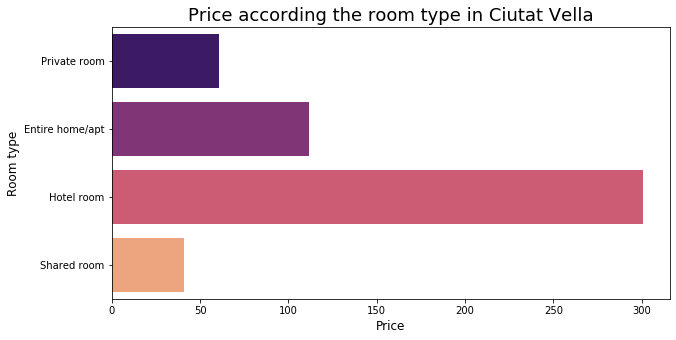

,price
room_type,
Hotel room,300.873684
Entire home/apt,111.426019
Private room,60.561410
Shared room,41.185185


In [50]:
#Call to calculate_price_mean_and_plot function with Ciutat Vella district data
calculate_price_mean_and_plot(df[df.district == 'Ciutat Vella'])

In [51]:
#Median price booking table of each neigbourhood of Ciutat Vella district per room type
pd.DataFrame(df.query("district == 'Ciutat Vella'").groupby(['district','neighbourhood','room_type']).mean()['price'])

price
district     neighbourhood                         room_type                  
Ciutat Vella Sant Pere, Santa Caterina i la Ribera Entire home/apt   94.726829
                                                   Hotel room       292.333333
                                                   Private room      59.724756
                                                   Shared room       52.125000
             el Barri Gòtic                        Entire home/apt  137.661616
                                                   Hotel room       346.875000
                                                   Private room      68.419554
                                                   Shared room       34.600000
             el Raval                              Entire home/apt  108.162625
                                                   Hotel room       315.394737
                                                   Private room      55.666667
                                                   Shared room       36.500000
             la Barceloneta                        Entire home/apt  100.340659
                                                   Hotel room       104.800000
                                                   Private room      56.298913
                                                   Shared room       39.250000